In [408]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from krwordrank.word import summarize_with_keywords
from sklearn.cluster import KMeans

# 기본 데이터 EDA

In [2]:
company = pd.read_csv('./MBN00005T.csv',encoding = 'cp949')
company

,FSUJABH,BASEDT1,BASEDT2,PERID,ENTNM,EENTNM,GPCODE,CEONM,BONSA_ADDRESS,BONSA_TELNO,...,YNOTE3,YNOTE4,YNOTE5,YNOTE6,YNOTE7,YNOTE8,YNOTE9,YNOTE10,YNOTE11,YNOTE12
0,30052,20180918,NaN,1.101140e+12,신보희망디딤돌제삼차유동화전문(유),"Hope Kodit Third Securitization Specialty Co.,...",NaN,송위규,"서울특별시 영등포구 은행로 14 (여의도동), 한국산업은행",02-787-6605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30071,20181207,NaN,1.101140e+12,트레져씨티유동화전문(유),Treasure City Asset Securitization Specialty C...,NaN,유광균,"서울특별시 중구 을지로 66 (을지로2가), 외환은행본점",02-729-0428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30072,20180918,NaN,1.101140e+12,도공제오차유동화전문(유),KHC 5th Securitization Specialty Co.,NaN,문양주,서울특별시 영등포구 국제금융로8길 26 (여의도동),02-2073-8482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30074,20180918,NaN,1.101140e+12,도공제사차유동화전문(유),KHC 4th Securitization Specialty Co.,NaN,최혜경,서울특별시 영등포구 국제금융로8길 26 (여의도동),02-2073-8492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30080,20180918,NaN,1.101140e+12,산은캐피탈제사차유동화전문(유),NaN,NaN,노미실,서울특별시 영등포구 은행로 14 (여의도동),02-768-3341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,8998700435,20181008,NaN,1.101116e+12,포스트아네모네(주),"POSTANEMONE Co., Ltd",NaN,정양호,"서울특별시 영등포구 여의대방로69길 17(여의도동,메리츠종합금융증권 내)",02-2229-6334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42067,8998700963,20181019,NaN,1.101117e+12,뉴하이미아제일차(주),"NEW HI MIA NO.1 CO,.LTD",NaN,박종필,"서울특별시 영등포구 여의나루로 61 (여의도동, 하이투자증권빌딩)",02-2122-9769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42068,8998701263,20190404,NaN,1.101117e+12,하나머스트제6호기업인수목적(주),Hana Must Sixth Special Purpose Acquisition Co...,NaN,류제일,서울시 영등포구 의사당대로 82,02-3771-3188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42069,8998800015,20190131,NaN,1.101116e+12,신한에스러셀(주),"Shinhan S-Russell Co.,Ltd.",NaN,심은정,서울특별시 중구 세종대로9길 20 (태평로2가),02-2151-4968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42071 entries, 0 to 42070
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FSUJABH        42071 non-null  int64  
 1   BASEDT1        42071 non-null  int64  
 2   BASEDT2        6445 non-null   float64
 3   PERID          42029 non-null  float64
 4   ENTNM          42071 non-null  object 
 5   EENTNM         38801 non-null  object 
 6   GPCODE         959 non-null    object 
 7   CEONM          42051 non-null  object 
 8   BONSA_ADDRESS  42061 non-null  object 
 9   BONSA_TELNO    42010 non-null  object 
 10  BONSA_FAXNO    27882 non-null  object 
 11  SAUP_ADDRESS   6445 non-null   object 
 12  SAUP_TELNO     6444 non-null   object 
 13  SAUP_FAXNO     6421 non-null   object 
 14  OPEDT          42058 non-null  float64
 15  ORGBK          6442 non-null   object 
 16  SCALE          42071 non-null  object 
 17  LISTYN         42071 non-null  object 
 18  HOMEPA

## 유용한 컬럼 추출

In [4]:
company_data = company[['ENTNM','BONSA_ADDRESS','SCALE','BISTYPE','GOODNM']]

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42071 entries, 0 to 42070
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ENTNM          42071 non-null  object
 1   BONSA_ADDRESS  42061 non-null  object
 2   SCALE          42071 non-null  object
 3   BISTYPE        42071 non-null  object
 4   GOODNM         7319 non-null   object
dtypes: object(5)
memory usage: 1.6+ MB


In [6]:
"유동화" in "유동화전문회사"

True

In [7]:
drop_index_list = []
for num,company_type in enumerate(company_data['BISTYPE']):
    if "유동화" in company_type:
        drop_index_list.append(num)
drop_index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 164,
 182,
 184,
 194,
 202,
 212,
 222,
 225,
 422,
 453,
 454,
 455,
 456,
 473,
 564,
 725,
 727,
 728,
 731,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 1017,
 1020,
 1043,
 1066,
 1080,
 1082,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1123,
 1127,
 1129,
 1130,
 1136,
 1138,
 1145,
 1146,
 1148,
 1150,
 1153,
 1154,
 1156,
 1158,
 1159,
 1160,
 1161,
 1162,
 1167,
 1169,
 1181,
 1183,
 1184,
 1187,
 1188,
 1191,
 1195,
 1200,
 1202,
 1203,
 1204,
 1206,
 1207,
 1208,
 1215,
 1216,
 1217,
 1218,
 1219,
 1222,
 1223,
 1225,
 1226,
 1228,
 1230,
 1235,
 1236,
 1246,
 1254,
 1269,
 1272,
 1274,
 1277,
 1282,
 1284,
 1292,
 1295,
 1300,
 1301,
 1302,
 1303,
 1304,
 1305,
 1306,
 1307,
 1309,
 1312,
 1313,
 1316,
 1317,
 1323,
 1326,
 1334,
 1335,
 1336,
 1342,
 1346,
 1348,
 1349,
 1350,
 1351,
 1354,
 1356,
 1358,
 1361,
 1364,
 1365,
 1366,
 1368,
 1369,
 1371,
 1372,
 1373,
 1377,
 1378,
 1379,
 13

In [8]:
company_data = company_data.drop(index=drop_index_list,axis=0)
company_data.reset_index(inplace = True,drop = True)

In [9]:
company_data[company_data['BONSA_ADDRESS'].isna()]

,ENTNM,BONSA_ADDRESS,SCALE,BISTYPE,GOODNM
1392,(주)대영콘크리트,NaN,중소기업,"(C23320)콘크리트, 시멘트 및 플라스터 제품 제조업",NaN
10205,에버그린관광호텔,NaN,중소기업,(I55100)숙박시설 운영업,NaN
10257,원부산업(주),NaN,중소기업,(C23230)구조용 비내화 요업제품 제조업,NaN
16862,한국이와타엔지니어링(주),NaN,중소기업,(J58200)소프트웨어 개발 및 공급업,NaN
29901,보광양행(주),NaN,중소기업,"(C24120)철강 압연, 압출 및 연신제품 제조업",NaN
30351,동국철강(주),NaN,중소기업,"(C24120)철강 압연, 압출 및 연신제품 제조업",NaN
30660,서호제강(주),NaN,중소기업,"(C24220)비철금속 압연, 압출 및 연신제품 제조업",NaN
33168,대동광업(주),NaN,중소기업,(B07000)비금속광물 광업;연료용 제외,NaN
35507,제주컨추리관광호텔,NaN,중소기업,(I55100)숙박시설 운영업,NaN


In [10]:
fill_value = ['인천광역시 남동구 논현동 66-12',
                               '경기도 양주시 장흥면 권율로 190-45',
                               '',
                               '',
                               '',
                               '서울특별시 중구 을지로5길 19 (수하동)',
                               '경기도 화성시 반정동 448-8',
                               '경상남도 양산시 덕명로 57 (덕계동)',
                               '']

In [11]:
fill_value

['인천광역시 남동구 논현동 66-12',
 '경기도 양주시 장흥면 권율로 190-45',
 '',
 '',
 '',
 '서울특별시 중구 을지로5길 19 (수하동)',
 '경기도 화성시 반정동 448-8',
 '경상남도 양산시 덕명로 57 (덕계동)',
 '']

In [12]:
company_data = company_data.copy()
company_data.loc[company_data['BONSA_ADDRESS'].isna(),'BONSA_ADDRESS'] = fill_value 

In [13]:
company_data

,ENTNM,BONSA_ADDRESS,SCALE,BISTYPE,GOODNM
0,엑세스바이오인코퍼레이션,"65 Clyde Road Suite A Somerset NJ 08873, USA",중소기업,(C21300)의료용품 및 기타 의약 관련제품 제조업,말라리아
1,잉글우드랩(주),"88 W. SHEFFIELD AVENUE, ENGLEWOOD, NJ, 07631, USA",중소기업,(M71500)회사 본부 및 경영 컨설팅 서비스업,NaN
2,(주)제로하이텍,경기도 화성시 정남면 시청로 1768-12,중소기업,(G45000)자동차 및 부품 판매업,NaN
3,PT MIWON INDONESIA TBK,JL.JEND.GATOT SUBROTO KAV.27 JAKARTA SELATAN I...,중소기업,(C10740)조미료 및 식품 첨가물 제조업,"식품,인쇄"
4,HYUNDAI ASSAN OTOMOTIV SANYAI VE TICARET A.S,서울특별시 서초구 양재동 현대빌딩 17층,중소기업,(C30121)승용차 및 기타 여객용 자동차 제조업,"조립완성차,수입완성차"
...,...,...,...,...,...
37860,그로쓰파트너(주),서울특별시 중구 을지로5길 26,대기업,(K64999)그 외 기타 분류 안된 금융업,NaN
37861,베가해운(주),부산광역시 해운대구 센텀중앙로 97 센텀스카이비즈 에이동 2107호,중소기업,(H50122)내항 화물 운송업,NaN
37862,신대한인쇄(주),경기도 안산시 단원구 별망로159번길 13(성곡동),중소기업,(C18110)인쇄업,NaN
37863,하나머스트제6호기업인수목적(주),서울시 영등포구 의사당대로 82,중소기업,(K66199)그 외 기타 금융 지원 서비스업,NaN


* 만약 주소가 없다면 폐업으로 간주하고 삭제

In [14]:
for num,add in enumerate(company_data['BONSA_ADDRESS']):
    if add == '':
        company_data.drop(index=num,axis = 0,inplace = True)     

# 중견기업과 대기업을 대상

In [16]:
big_idx = [idx for idx,i in enumerate(company_data['SCALE']) if i in ['중견기업','대기업']]

In [17]:
company_data = company_data.iloc[big_idx]
company_data.reset_index(drop=True,inplace=True)
company_data

,ENTNM,BONSA_ADDRESS,SCALE,BISTYPE,GOODNM
0,(주)대성합동지주,서울특별시 종로구 인사동길 49 (관훈동),중견기업,(M71520)비금융 지주회사,"기타수익(기타),상품매출(상품),지분법이익(기타)"
1,삼환기업(주),서울특별시 종로구 율곡로 82,중견기업,(F41221)도로 건설업,"국내도급(건축),국내도급(토목),해외도급(건축),해외도급(토목)"
2,(주)모토닉,서울특별시 종로구 사직로1길 50 (행촌동),중견기업,(C30300)자동차 신품 부품 제조업,"FPC(기타), LPI SYSTEM(기타), O/PUMP(기타), P/CLUTCH(..."
3,현대자동차(주),서울특별시 서초구 헌릉로 12 (양재동),대기업,(C30121)승용차 및 기타 여객용 자동차 제조업,"금융부문, 기타부문, 차량부문"
4,대성산업가스(주),서울특별시 구로구 경인로 662 12층,중견기업,(C20121)산업용 가스 제조업,"BULK영업부,TONNAGE부,특수가스외"
...,...,...,...,...,...
3773,(주)다올자산개발,서울특별시 강남구 도산대로 442 404호,중견기업,(L68000)부동산업,NaN
3774,롯데타운동탄(주),"경기도 화성시 동탄대로19길 10, 601호 (오산동, 신유메디프라자)",대기업,(L68122)비주거용 건물 개발 및 공급업,NaN
3775,효성티앤씨(주),서울시 마포구 마포대로 119,대기업,(C20500)화학섬유 제조업,NaN
3776,(주)비지에프리테일,"서울시 강남구 테헤란로 405, BGF",중견기업,(G47122)체인화 편의점,"용역 (가맹점),(용역), 직영/가맹점 상품 판매(상품)"


# 업종 텍스트 처리하기

In [195]:
from collections import OrderedDict

text = '부동산 임대업 임대업'

# 순서를 보존하기 위해 OrderedDict 사용
unique_words = list(OrderedDict.fromkeys(text.split()))
# 중복 제거된 단어들을 다시 합쳐서 문자열로 만듦
unique_text = ' '.join(unique_words)
print(unique_text)

부동산 임대업


In [340]:
keyword_list = []
for cat in company_data['BISTYPE']:
    cat = re.sub(r"\(.+\)",'',cat)
    cat = re.sub(r"[ㆍ·.,;]",' ',cat)
    cat = re.sub(r"[0-9]+차",'',cat)
    cat = re.sub(r"[ ]+",' ',cat)
#     tmp1 = cat.split(' ')
#     tmp2 = ''.join(tmp1[0])
#     pattern = r"[^ ]+업"
#     tmp = re.search(pattern, cat)
#     if tmp:
#         cat = tmp.group()
#         #cat = tmp2+' '+cat
    cat = cat.split(' ')
    stopwords = ['그외','기타','그','외','안된','분류']
    filtered_cat = [keyword for keyword in cat if len(keyword) >= 2 and keyword not in stopwords]
    filtered_cat = ' '.join(filtered_cat)
    
    filtered_cat = list(OrderedDict.fromkeys(filtered_cat.split()))

    # 중복 제거된 단어들을 다시 합쳐서 문자열로 만듦
    filtered_cat = ''.join(filtered_cat)
    filtered_cat = filtered_cat.strip()
    keyword_list.append(filtered_cat)
keyword_list    

['비금융지주회사',
 '도로건설업',
 '자동차신품부품제조업',
 '승용차여객용자동차제조업',
 '산업용가스제조업',
 '상품종합도매업',
 '도로건설업',
 '자동차신품부품제조업',
 '시멘트제조업',
 '지반조성건설업',
 '석탄화학계화합물기초유기화학물질제조업',
 '외항화물운송업',
 '편조의복제조업',
 '휴양콘도운영업',
 '외항화물운송업',
 '토목시설물건설업',
 '컴퓨터시스템통합자문구축서비스업',
 '방문판매업',
 '일반서적출판업',
 '통관대리관련서비스업',
 '데이터베이스온라인정보제공업',
 '데이터베이스온라인정보제공업',
 '주거용건물개발공급업',
 '전문도매업',
 '건물토목엔지니어링서비스업',
 '교량터널철도건설업',
 '건축설계관련서비스업',
 '데이터베이스온라인정보제공업',
 '유선방송업',
 '옥외시설물축조관련전문공사업',
 '유리창호공사업',
 '여행사업',
 '금융업',
 '비주거용건물임대업',
 '외항화물운송업',
 '일반서적출판업',
 '항공여객운송업',
 '타이어튜브제조업',
 '여행사업',
 '신용조사추심대행업',
 '비주거용건물개발공급업',
 '데이터베이스온라인정보제공업',
 '운동경기용품도매업',
 '외항화물운송업',
 '시계귀금속제품도매업',
 '귀금속관련제품제조업',
 '액체연료관련제품도매업',
 '주거용건물임대업',
 '시스템소프트웨어개발공급업',
 '전문서비스업',
 '지주회사',
 '복권발행판매업',
 '남자용겉옷소매업',
 '외항화물운송업',
 '사업시설유지관리서비스업',
 '사업시설유지관리서비스업',
 '전기업',
 '윤활유그리스제조업',
 '골프장운영업',
 '화장품화장용품도매업',
 '주거용건물개발공급업',
 '매니저업',
 '연료소매업',
 '도로관련시설운영업',
 '사업지원서비스업',
 '부동산임대업',
 '석유화학계기초화학물질제조업',
 '원유정제처리업',
 '토목시설물건설업',
 '화학물질화학제품제조업의약품제외',
 '의약용화합물항생물질제조업',
 '원유천연가스채굴관련서비스업',
 '화력발전

In [341]:
new_kind = keyword_list

In [342]:
company_data['company_kind'] = new_kind
company_data_revision = company_data.drop(columns = ['BISTYPE','GOODNM'])
company_data_revision

/tmp/ipykernel_1752458/1733179865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['company_kind'] = new_kind


,ENTNM,BONSA_ADDRESS,SCALE,company_kind
0,(주)대성합동지주,서울특별시 종로구 인사동길 49 (관훈동),중견기업,비금융지주회사
1,삼환기업(주),서울특별시 종로구 율곡로 82,중견기업,도로건설업
2,(주)모토닉,서울특별시 종로구 사직로1길 50 (행촌동),중견기업,자동차신품부품제조업
3,현대자동차(주),서울특별시 서초구 헌릉로 12 (양재동),대기업,승용차여객용자동차제조업
4,대성산업가스(주),서울특별시 구로구 경인로 662 12층,중견기업,산업용가스제조업
...,...,...,...,...
3773,(주)다올자산개발,서울특별시 강남구 도산대로 442 404호,중견기업,부동산업
3774,롯데타운동탄(주),"경기도 화성시 동탄대로19길 10, 601호 (오산동, 신유메디프라자)",대기업,비주거용건물개발공급업
3775,효성티앤씨(주),서울시 마포구 마포대로 119,대기업,화학섬유제조업
3776,(주)비지에프리테일,"서울시 강남구 테헤란로 405, BGF",중견기업,체인화편의점


# company_kind DBSCAN 수행

In [343]:
company_kind = company_data_revision['company_kind']
company_kind

0            비금융지주회사
1              도로건설업
2         자동차신품부품제조업
3       승용차여객용자동차제조업
4           산업용가스제조업
            ...     
3773            부동산업
3774     비주거용건물개발공급업
3775         화학섬유제조업
3776          체인화편의점
3777             금융업
Name: company_kind, Length: 3778, dtype: object

In [344]:
company_idx_dict = {}
group_num = 0
for kind in company_kind:
    if kind not in company_idx_dict:
        company_idx_dict[kind] = group_num
        group_num+=1
company_idx_dict

{'비금융지주회사': 0,
 '도로건설업': 1,
 '자동차신품부품제조업': 2,
 '승용차여객용자동차제조업': 3,
 '산업용가스제조업': 4,
 '상품종합도매업': 5,
 '시멘트제조업': 6,
 '지반조성건설업': 7,
 '석탄화학계화합물기초유기화학물질제조업': 8,
 '외항화물운송업': 9,
 '편조의복제조업': 10,
 '휴양콘도운영업': 11,
 '토목시설물건설업': 12,
 '컴퓨터시스템통합자문구축서비스업': 13,
 '방문판매업': 14,
 '일반서적출판업': 15,
 '통관대리관련서비스업': 16,
 '데이터베이스온라인정보제공업': 17,
 '주거용건물개발공급업': 18,
 '전문도매업': 19,
 '건물토목엔지니어링서비스업': 20,
 '교량터널철도건설업': 21,
 '건축설계관련서비스업': 22,
 '유선방송업': 23,
 '옥외시설물축조관련전문공사업': 24,
 '유리창호공사업': 25,
 '여행사업': 26,
 '금융업': 27,
 '비주거용건물임대업': 28,
 '항공여객운송업': 29,
 '타이어튜브제조업': 30,
 '신용조사추심대행업': 31,
 '비주거용건물개발공급업': 32,
 '운동경기용품도매업': 33,
 '시계귀금속제품도매업': 34,
 '귀금속관련제품제조업': 35,
 '액체연료관련제품도매업': 36,
 '주거용건물임대업': 37,
 '시스템소프트웨어개발공급업': 38,
 '전문서비스업': 39,
 '지주회사': 40,
 '복권발행판매업': 41,
 '남자용겉옷소매업': 42,
 '사업시설유지관리서비스업': 43,
 '전기업': 44,
 '윤활유그리스제조업': 45,
 '골프장운영업': 46,
 '화장품화장용품도매업': 47,
 '매니저업': 48,
 '연료소매업': 49,
 '도로관련시설운영업': 50,
 '사업지원서비스업': 51,
 '부동산임대업': 52,
 '석유화학계기초화학물질제조업': 53,
 '원유정제처리업': 54,
 '화학물질화학제품제조업의약품제외': 55,
 '의약용화합물항생물질제조업': 56,
 '원

In [345]:
len(company_idx_dict)

750

* 623개의 종류의 회사

## 사전훈련된 한국어 FastText를 이용해 벡터화

In [346]:
fasttext = FastText.load_fasttext_format('./ft.morpheme.char.w+namu+nsmc.bin')

/tmp/ipykernel_1752458/2451447361.py:1: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext = FastText.load_fasttext_format('./ft.morpheme.char.w+namu+nsmc.bin')


In [347]:
vec_list = []
kind_list = [] # 623개의 종류의 회사에 대해서 클러스터링 수행
for kind in company_kind:
    if company_idx_dict[kind] not in kind_list: 
        kind_list.append(company_idx_dict[kind])
        tmp = fasttext.wv[kind]
        vec_list.append(tmp)
vec_list

[array([-0.20315023,  0.22906232, -0.41986057,  0.00120491,  0.28213325,
        -0.0210363 , -0.129948  ,  0.09844179, -0.259241  , -0.04138544,
        -0.2948886 ,  0.26830152, -0.3037581 , -0.20061974, -0.07566815,
        -0.1065249 ,  0.19171208,  0.0468231 ,  0.4522629 , -0.2919776 ,
         0.02228168,  0.1702527 , -0.39165008, -0.17923298, -0.29976118,
         0.09515085, -0.16570722, -0.10975643,  0.2017908 ,  0.10248658,
         0.7498979 , -0.48380327,  0.02019356, -0.22177763, -0.08322562,
         0.21716647,  0.16051207, -0.45343217,  0.05355486,  0.2905803 ,
         0.405129  ,  0.09430061, -0.0112509 ,  0.40735814,  0.01135938,
        -0.27414298,  0.11178055,  0.05969134, -0.01432526,  0.2373476 ,
         0.43159685, -0.16727625, -0.27139676,  0.00401517, -0.02944701,
         0.0289969 ,  0.36002958,  0.28088427,  0.08034588, -0.19927166,
         0.4524204 , -0.41944104, -0.20960149, -0.28437763,  0.07257807,
         0.40117776,  0.13376676,  0.20579281, -0.5

In [348]:
vec_array = np.array(vec_list)

# ELBOW POINT 찾기

In [387]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 100):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1,100), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

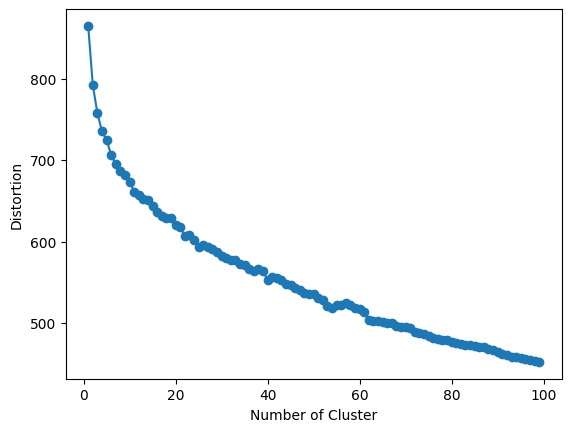

In [388]:
visualize_elbowmethod(vec_array)

In [389]:
big_kmean = KMeans(n_clusters=20,max_iter=500,)
# dbscan = DBSCAN(eps = 0.14,min_samples = 2, metric = 'cosine')
predict_array = big_kmean.fit_predict(vec_array)

In [390]:
tmp_df = pd.DataFrame({'cluster':predict_array})
tmp_df

,cluster
0,9
1,9
2,12
3,3
4,3
...,...
745,3
746,8
747,8
748,10


* 몇개의 종류가 나오는지 확인

In [391]:
tmp_df.value_counts()

cluster
10         148
8          125
14         113
3           95
12          73
15          48
0           33
7           26
2           22
4           19
9           18
1           16
11           3
5            3
13           3
6            1
16           1
17           1
18           1
19           1
dtype: int64

## 같은 클러스터로 묶인 업종 확인

In [392]:
kind_array = np.array(kind_list) # 데이터 형태를 맞추기 위해 array로 변형

In [393]:
group_dict = defaultdict(set)

for real,predict in zip(kind_array,predict_array):
    if predict not in group_dict: # 만약 group_dict에 존재하지 않을경우
        tmp_set = set()
        tmp_set.add(real)
        group_dict[predict] = tmp_set
    else:
        group_dict[predict].add(real)
group_dict

defaultdict(set,
            {9: {0,
              1,
              26,
              44,
              82,
              101,
              146,
              169,
              278,
              310,
              314,
              352,
              395,
              411,
              451,
              522,
              551,
              595},
             12: {2,
              16,
              20,
              21,
              29,
              31,
              43,
              46,
              52,
              57,
              60,
              65,
              70,
              86,
              89,
              106,
              112,
              114,
              122,
              134,
              144,
              145,
              152,
              171,
              182,
              213,
              221,
              242,
              257,
              272,
              298,
              299,
              301,
              302,
          

* 한개로 표시된 것들은 실제로 같은 그룹인 경우

## 어떤 그룹이 묶였는지 확인

In [394]:
company_idx_dict

{'비금융지주회사': 0,
 '도로건설업': 1,
 '자동차신품부품제조업': 2,
 '승용차여객용자동차제조업': 3,
 '산업용가스제조업': 4,
 '상품종합도매업': 5,
 '시멘트제조업': 6,
 '지반조성건설업': 7,
 '석탄화학계화합물기초유기화학물질제조업': 8,
 '외항화물운송업': 9,
 '편조의복제조업': 10,
 '휴양콘도운영업': 11,
 '토목시설물건설업': 12,
 '컴퓨터시스템통합자문구축서비스업': 13,
 '방문판매업': 14,
 '일반서적출판업': 15,
 '통관대리관련서비스업': 16,
 '데이터베이스온라인정보제공업': 17,
 '주거용건물개발공급업': 18,
 '전문도매업': 19,
 '건물토목엔지니어링서비스업': 20,
 '교량터널철도건설업': 21,
 '건축설계관련서비스업': 22,
 '유선방송업': 23,
 '옥외시설물축조관련전문공사업': 24,
 '유리창호공사업': 25,
 '여행사업': 26,
 '금융업': 27,
 '비주거용건물임대업': 28,
 '항공여객운송업': 29,
 '타이어튜브제조업': 30,
 '신용조사추심대행업': 31,
 '비주거용건물개발공급업': 32,
 '운동경기용품도매업': 33,
 '시계귀금속제품도매업': 34,
 '귀금속관련제품제조업': 35,
 '액체연료관련제품도매업': 36,
 '주거용건물임대업': 37,
 '시스템소프트웨어개발공급업': 38,
 '전문서비스업': 39,
 '지주회사': 40,
 '복권발행판매업': 41,
 '남자용겉옷소매업': 42,
 '사업시설유지관리서비스업': 43,
 '전기업': 44,
 '윤활유그리스제조업': 45,
 '골프장운영업': 46,
 '화장품화장용품도매업': 47,
 '매니저업': 48,
 '연료소매업': 49,
 '도로관련시설운영업': 50,
 '사업지원서비스업': 51,
 '부동산임대업': 52,
 '석유화학계기초화학물질제조업': 53,
 '원유정제처리업': 54,
 '화학물질화학제품제조업의약품제외': 55,
 '의약용화합물항생물질제조업': 56,
 '원

In [395]:
# index와 company를 뒤집음
idx_company_dict = {value: key for key,value in company_idx_dict.items()}
idx_company_dict

{0: '비금융지주회사',
 1: '도로건설업',
 2: '자동차신품부품제조업',
 3: '승용차여객용자동차제조업',
 4: '산업용가스제조업',
 5: '상품종합도매업',
 6: '시멘트제조업',
 7: '지반조성건설업',
 8: '석탄화학계화합물기초유기화학물질제조업',
 9: '외항화물운송업',
 10: '편조의복제조업',
 11: '휴양콘도운영업',
 12: '토목시설물건설업',
 13: '컴퓨터시스템통합자문구축서비스업',
 14: '방문판매업',
 15: '일반서적출판업',
 16: '통관대리관련서비스업',
 17: '데이터베이스온라인정보제공업',
 18: '주거용건물개발공급업',
 19: '전문도매업',
 20: '건물토목엔지니어링서비스업',
 21: '교량터널철도건설업',
 22: '건축설계관련서비스업',
 23: '유선방송업',
 24: '옥외시설물축조관련전문공사업',
 25: '유리창호공사업',
 26: '여행사업',
 27: '금융업',
 28: '비주거용건물임대업',
 29: '항공여객운송업',
 30: '타이어튜브제조업',
 31: '신용조사추심대행업',
 32: '비주거용건물개발공급업',
 33: '운동경기용품도매업',
 34: '시계귀금속제품도매업',
 35: '귀금속관련제품제조업',
 36: '액체연료관련제품도매업',
 37: '주거용건물임대업',
 38: '시스템소프트웨어개발공급업',
 39: '전문서비스업',
 40: '지주회사',
 41: '복권발행판매업',
 42: '남자용겉옷소매업',
 43: '사업시설유지관리서비스업',
 44: '전기업',
 45: '윤활유그리스제조업',
 46: '골프장운영업',
 47: '화장품화장용품도매업',
 48: '매니저업',
 49: '연료소매업',
 50: '도로관련시설운영업',
 51: '사업지원서비스업',
 52: '부동산임대업',
 53: '석유화학계기초화학물질제조업',
 54: '원유정제처리업',
 55: '화학물질화학제품제조업의약품제외',
 56: '의약용화합물항생물질제조업',
 57

In [396]:
len(idx_company_dict)

750

In [397]:
group_dict_kind_ver = {}
for key,value in group_dict.items():
    temp = set()
    for cluster in value:
        temp.add(idx_company_dict[cluster])
    group_dict[key] = temp
group_dict

defaultdict(set,
            {9: {'곡물제분업',
              '금속가공업',
              '뉴스제공업',
              '도로건설업',
              '방적업',
              '비금융지주회사',
              '상호저축은행저축기관',
              '생수생산업',
              '소주제조업',
              '양돈업',
              '여행사업',
              '염색가공업',
              '원양어업',
              '전기업',
              '종합건설업',
              '철강제조업',
              '커피가공업',
              '토목건설업'},
             12: {'건물건설업',
              '건물산업설비청소방제서비스업',
              '건물설비설치공사업',
              '건물토목엔지니어링서비스업',
              '건설장비운영업',
              '건축기술엔지니어링과학기술서비스업',
              '건축기술엔지니어링관련기술서비스업',
              '경영컨설팅업',
              '골프장운영업',
              '공항운영업',
              '교량터널철도건설업',
              '기술직업훈련학원',
              '내부통신배선공사업',
              '대형마트',
              '도시철도운송업',
              '물류터미널운영업',
              '배관난방공사업',
              '복합비료화학비료제조업',
              '부동산관리업',
              '부동산임대업',
              '분류안된운송관련서비스업'

# Clustering한 회사 데이터 확인

In [398]:
company_data_revision

,ENTNM,BONSA_ADDRESS,SCALE,company_kind
0,(주)대성합동지주,서울특별시 종로구 인사동길 49 (관훈동),중견기업,비금융지주회사
1,삼환기업(주),서울특별시 종로구 율곡로 82,중견기업,도로건설업
2,(주)모토닉,서울특별시 종로구 사직로1길 50 (행촌동),중견기업,자동차신품부품제조업
3,현대자동차(주),서울특별시 서초구 헌릉로 12 (양재동),대기업,승용차여객용자동차제조업
4,대성산업가스(주),서울특별시 구로구 경인로 662 12층,중견기업,산업용가스제조업
...,...,...,...,...
3773,(주)다올자산개발,서울특별시 강남구 도산대로 442 404호,중견기업,부동산업
3774,롯데타운동탄(주),"경기도 화성시 동탄대로19길 10, 601호 (오산동, 신유메디프라자)",대기업,비주거용건물개발공급업
3775,효성티앤씨(주),서울시 마포구 마포대로 119,대기업,화학섬유제조업
3776,(주)비지에프리테일,"서울시 강남구 테헤란로 405, BGF",중견기업,체인화편의점


In [399]:
company_data_revision['company_kind'] = new_kind

In [400]:
# 각 업종별 그룹 딕셔너리 생성
idx_group_dict = {}
for key,value_set in group_dict.items():
    for value in value_set:
        idx_group_dict[value] = key
idx_group_dict

{'철강제조업': 9,
 '곡물제분업': 9,
 '뉴스제공업': 9,
 '커피가공업': 9,
 '도로건설업': 9,
 '종합건설업': 9,
 '전기업': 9,
 '소주제조업': 9,
 '비금융지주회사': 9,
 '생수생산업': 9,
 '원양어업': 9,
 '상호저축은행저축기관': 9,
 '염색가공업': 9,
 '방적업': 9,
 '토목건설업': 9,
 '금속가공업': 9,
 '여행사업': 9,
 '양돈업': 9,
 '환경관련엔지니어링서비스업': 12,
 '항구해상터미널운영업': 12,
 '기술직업훈련학원': 12,
 '지상파방송업': 12,
 '유원지오락관련서비스업': 12,
 '중고상품소매업': 12,
 '손해보험업': 12,
 '특수목적용기계제조업': 12,
 '셔츠블라우스제조업': 12,
 '자전거운송장비소매업': 12,
 '회사본부경영컨설팅서비스업': 12,
 '건물설비설치공사업': 12,
 '건물토목엔지니어링서비스업': 12,
 '산업생산시설종합건설업': 12,
 '셔츠블라우스소매업': 12,
 '건설장비운영업': 12,
 '부동산임대업': 12,
 '아파트건설업': 12,
 '일반화물자동차운송업': 12,
 '화물포장검수계량서비스업': 12,
 '내부통신배선공사업': 12,
 '창고운송관련서비스업': 12,
 '배관난방공사업': 12,
 '포털인터넷정보매개서비스업': 12,
 '증권발행관리보관거래지원서비스업': 12,
 '자동차신품부품제조업': 12,
 '정보기술컴퓨터운영관련서비스업': 12,
 '복합비료화학비료제조업': 12,
 '주차장운영업': 12,
 '스포츠오락관련서비스업': 12,
 '부동산관리업': 12,
 '대형마트': 12,
 '분류안된운송관련서비스업': 12,
 '컴퓨터프린터제조업': 12,
 '건물건설업': 12,
 '화물자동차특수목적용자동차제조업': 12,
 '영림업': 12,
 '교량터널철도건설업': 12,
 '소독구충방제서비스업': 12,
 '건물산업설비청소방제서비스업': 12,
 '수상운송지원서비스업': 12,
 '골프장운영

In [401]:
# 각 회사별 그룹 리스트 생성
company_group_list = []
for company_dt in company_data_revision['company_kind']:
    company_group_list.append(idx_group_dict[company_dt])
company_group_list

[9,
 9,
 12,
 3,
 3,
 8,
 9,
 12,
 4,
 3,
 8,
 8,
 3,
 10,
 8,
 10,
 0,
 15,
 3,
 12,
 0,
 0,
 7,
 15,
 12,
 12,
 2,
 0,
 8,
 10,
 4,
 9,
 11,
 8,
 8,
 3,
 12,
 14,
 9,
 12,
 7,
 0,
 8,
 8,
 8,
 10,
 10,
 8,
 0,
 2,
 16,
 8,
 8,
 8,
 12,
 12,
 9,
 3,
 12,
 8,
 7,
 10,
 15,
 7,
 2,
 12,
 14,
 10,
 10,
 8,
 14,
 12,
 10,
 0,
 12,
 3,
 10,
 14,
 10,
 2,
 8,
 12,
 8,
 8,
 15,
 3,
 12,
 8,
 8,
 7,
 7,
 7,
 7,
 4,
 15,
 0,
 8,
 12,
 10,
 10,
 8,
 2,
 0,
 8,
 2,
 9,
 15,
 8,
 14,
 8,
 14,
 14,
 12,
 12,
 14,
 14,
 12,
 14,
 4,
 14,
 14,
 0,
 9,
 10,
 2,
 3,
 2,
 8,
 12,
 15,
 0,
 4,
 15,
 8,
 14,
 9,
 7,
 14,
 12,
 12,
 15,
 12,
 2,
 8,
 13,
 0,
 8,
 3,
 0,
 7,
 14,
 12,
 10,
 16,
 8,
 13,
 15,
 0,
 16,
 8,
 8,
 14,
 15,
 12,
 8,
 8,
 12,
 12,
 3,
 3,
 8,
 10,
 10,
 8,
 8,
 14,
 8,
 4,
 8,
 10,
 0,
 12,
 8,
 8,
 0,
 3,
 14,
 14,
 16,
 8,
 14,
 0,
 1,
 10,
 12,
 15,
 8,
 0,
 8,
 10,
 12,
 7,
 9,
 7,
 11,
 8,
 0,
 7,
 0,
 12,
 12,
 8,
 14,
 7,
 8,
 16,
 8,
 12,
 3,
 10,
 12,
 12,
 3,
 11,
 14,


In [402]:
company_data_revision['group'] = company_group_list
company_data_revision

,ENTNM,BONSA_ADDRESS,SCALE,company_kind,group
0,(주)대성합동지주,서울특별시 종로구 인사동길 49 (관훈동),중견기업,비금융지주회사,9
1,삼환기업(주),서울특별시 종로구 율곡로 82,중견기업,도로건설업,9
2,(주)모토닉,서울특별시 종로구 사직로1길 50 (행촌동),중견기업,자동차신품부품제조업,12
3,현대자동차(주),서울특별시 서초구 헌릉로 12 (양재동),대기업,승용차여객용자동차제조업,3
4,대성산업가스(주),서울특별시 구로구 경인로 662 12층,중견기업,산업용가스제조업,3
...,...,...,...,...,...
3773,(주)다올자산개발,서울특별시 강남구 도산대로 442 404호,중견기업,부동산업,11
3774,롯데타운동탄(주),"경기도 화성시 동탄대로19길 10, 601호 (오산동, 신유메디프라자)",대기업,비주거용건물개발공급업,7
3775,효성티앤씨(주),서울시 마포구 마포대로 119,대기업,화학섬유제조업,1
3776,(주)비지에프리테일,"서울시 강남구 테헤란로 405, BGF",중견기업,체인화편의점,0


In [403]:
company_data_revision['group'].value_counts()

8     690
12    543
10    532
3     391
14    388
15    245
0     200
7     196
9     127
2     109
4     100
16     82
1      74
11     60
13     26
17      5
5       5
18      2
6       2
19      1
Name: group, dtype: int64

In [502]:
idx_list = []
for idx,label in enumerate(big_kmean.labels_):
    if label==2:
        idx_list.append(idx)

In [503]:
idx_list

[22,
 39,
 51,
 81,
 94,
 103,
 205,
 248,
 253,
 275,
 300,
 340,
 353,
 354,
 367,
 459,
 492,
 513,
 590,
 599,
 655,
 688]

In [504]:
tmp = vec_array[idx_list].mean(axis=0)
tmp

array([-0.07785575,  0.20369615, -0.15680279, -0.03410333,  0.34297138,
       -0.0561299 ,  0.11213429,  0.3445561 , -0.03318966,  0.07477244,
       -0.09223581,  0.15492128, -0.54630697, -0.06140709, -0.37476328,
        0.13264157, -0.02558852,  0.07670916,  0.13371128, -0.18468004,
        0.10947284, -0.04163185, -0.07919148, -0.02099147, -0.26237518,
        0.01975657,  0.00094042, -0.13381025, -0.21537675, -0.07627515,
        0.5834534 , -0.06543918,  0.25219223, -0.28271642, -0.05790674,
        0.12880032,  0.07810137, -0.03396348, -0.21991192,  0.06422607,
        0.03087343,  0.07658298, -0.15146016,  0.25672066, -0.01354632,
       -0.08342398,  0.18078507, -0.09697353, -0.18185596,  0.06778534,
        0.15165833, -0.11863752, -0.23624678, -0.18654753,  0.24229096,
        0.17112741,  0.10898629, -0.11692941,  0.01627892, -0.11306772,
        0.3153442 , -0.15934943, -0.03522186, -0.24725737, -0.27185887,
        0.08894312,  0.0408618 ,  0.39145696, -0.14529549,  0.09

In [505]:
cluster_center = big_kmean.cluster_centers_
# 순서대로 저장되는 것을 확인할 수 있다.
cluster_center

array([[ 0.0361485 ,  0.10910892, -0.11734517, ..., -0.14622004,
         0.17078325, -0.02068429],
       [ 0.08201731,  0.00943301, -0.20441124, ..., -0.2668519 ,
         0.22198208, -0.07203273],
       [-0.07785575,  0.20369616, -0.15680279, ..., -0.24004368,
         0.41611817, -0.21633868],
       ...,
       [ 0.30383262, -0.15894693, -0.26411453, ..., -0.5783885 ,
         0.45601234,  0.08032061],
       [-0.4026206 ,  0.08392447, -0.12601459, ..., -0.37382442,
         0.6888355 , -0.15449563],
       [-0.22411823,  0.47879153,  0.34002787, ..., -0.53622794,
         0.966518  , -0.28453043]], dtype=float32)

# 클러스터의 중심 체크

In [512]:
from collections import defaultdict
distance_dict = defaultdict(list)
for center in range(0,20):
    centroid = cluster_center[center].reshape(1,-1)
    distance_dict[center]=[]
    for sub in range(0,20):
        sub_centroid = cluster_center[sub].reshape(1,-1)
        sim = cosine_similarity(centroid,sub_centroid).item()
        sim = np.round(sim,3)
        distance_dict[center].append(sim)
distance_dict

defaultdict(list,
            {0: [1.0,
              0.78,
              0.809,
              0.888,
              0.832,
              0.538,
              0.402,
              0.826,
              0.887,
              0.767,
              0.891,
              0.59,
              0.881,
              0.514,
              0.874,
              0.822,
              0.549,
              0.351,
              0.539,
              0.537],
             1: [0.78,
              1.0,
              0.701,
              0.871,
              0.817,
              0.646,
              0.483,
              0.796,
              0.846,
              0.808,
              0.878,
              0.541,
              0.797,
              0.512,
              0.935,
              0.831,
              0.474,
              0.33,
              0.434,
              0.51],
             2: [0.809,
              0.701,
              1.0,
              0.875,
              0.859,
              0.717,
              0.

# pivot_table 만들기

In [515]:
distance_df = pd.DataFrame(distance_dict)
distance_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000,0.780,0.809,0.888,0.832,0.538,0.402,0.826,0.887,0.767,0.891,0.590,0.881,0.514,0.874,0.822,0.549,0.351,0.539,0.537
1,0.780,1.000,0.701,0.871,0.817,0.646,0.483,0.796,0.846,0.808,0.878,0.541,0.797,0.512,0.935,0.831,0.474,0.330,0.434,0.510
2,0.809,0.701,1.000,0.875,0.859,0.717,0.496,0.750,0.821,0.847,0.858,0.776,0.939,0.607,0.833,0.860,0.591,0.370,0.547,0.590
3,0.888,0.871,0.875,1.000,0.902,0.715,0.552,0.911,0.960,0.900,0.984,0.703,0.947,0.567,0.972,0.923,0.555,0.377,0.498,0.614
4,0.832,0.817,0.859,0.902,1.000,0.753,0.498,0.821,0.855,0.907,0.908,0.761,0.921,0.570,0.912,0.858,0.630,0.400,0.592,0.604
5,0.538,0.646,0.717,0.715,0.753,1.000,0.575,0.600,0.656,0.847,0.720,0.734,0.720,0.445,0.737,0.731,0.486,0.303,0.382,0.551
6,0.402,0.483,0.496,0.552,0.498,0.575,1.000,0.473,0.520,0.556,0.556,0.542,0.498,0.325,0.546,0.577,0.272,0.338,0.246,0.462
7,0.826,0.796,0.750,0.911,0.821,0.600,0.473,1.000,0.949,0.804,0.938,0.546,0.877,0.482,0.897,0.871,0.422,0.365,0.377,0.479
8,0.887,0.846,0.821,0.960,0.855,0.656,0.520,0.949,1.000,0.869,0.977,0.650,0.933,0.552,0.942,0.946,0.496,0.376,0.416,0.533
9,0.767,0.808,0.847,0.900,0.907,0.847,0.556,0.804,0.869,1.000,0.903,0.795,0.919,0.659,0.897,0.907,0.671,0.372,0.573,0.628


# 데이터 저장하기

In [519]:
company_data_revision['original_kind'] = company_data['BISTYPE']
company_data_revision

,ENTNM,BONSA_ADDRESS,SCALE,company_kind,group,original_kind
0,(주)대성합동지주,서울특별시 종로구 인사동길 49 (관훈동),중견기업,비금융지주회사,9,(M71520)비금융 지주회사
1,삼환기업(주),서울특별시 종로구 율곡로 82,중견기업,도로건설업,9,(F41221)도로 건설업
2,(주)모토닉,서울특별시 종로구 사직로1길 50 (행촌동),중견기업,자동차신품부품제조업,12,(C30300)자동차 신품 부품 제조업
3,현대자동차(주),서울특별시 서초구 헌릉로 12 (양재동),대기업,승용차여객용자동차제조업,3,(C30121)승용차 및 기타 여객용 자동차 제조업
4,대성산업가스(주),서울특별시 구로구 경인로 662 12층,중견기업,산업용가스제조업,3,(C20121)산업용 가스 제조업
...,...,...,...,...,...,...
3773,(주)다올자산개발,서울특별시 강남구 도산대로 442 404호,중견기업,부동산업,11,(L68000)부동산업
3774,롯데타운동탄(주),"경기도 화성시 동탄대로19길 10, 601호 (오산동, 신유메디프라자)",대기업,비주거용건물개발공급업,7,(L68122)비주거용 건물 개발 및 공급업
3775,효성티앤씨(주),서울시 마포구 마포대로 119,대기업,화학섬유제조업,1,(C20500)화학섬유 제조업
3776,(주)비지에프리테일,"서울시 강남구 테헤란로 405, BGF",중견기업,체인화편의점,0,(G47122)체인화 편의점


In [520]:
company_data_revision.to_csv('company_clustering.csv',index=False)
distance_df.to_csv('company_group_simil.csv',index = False)